In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Data ingestion

veh_df = pd.read_csv(r'C:\Users\Akshay Deshmukh\Desktop\Great Learning\Project 5\vehicle.csv')

In [3]:
veh_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
veh_df.shape

(846, 19)

In [5]:
veh_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
veh_df['class'].value_counts()  ## CLass imbalance...

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
veh_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770


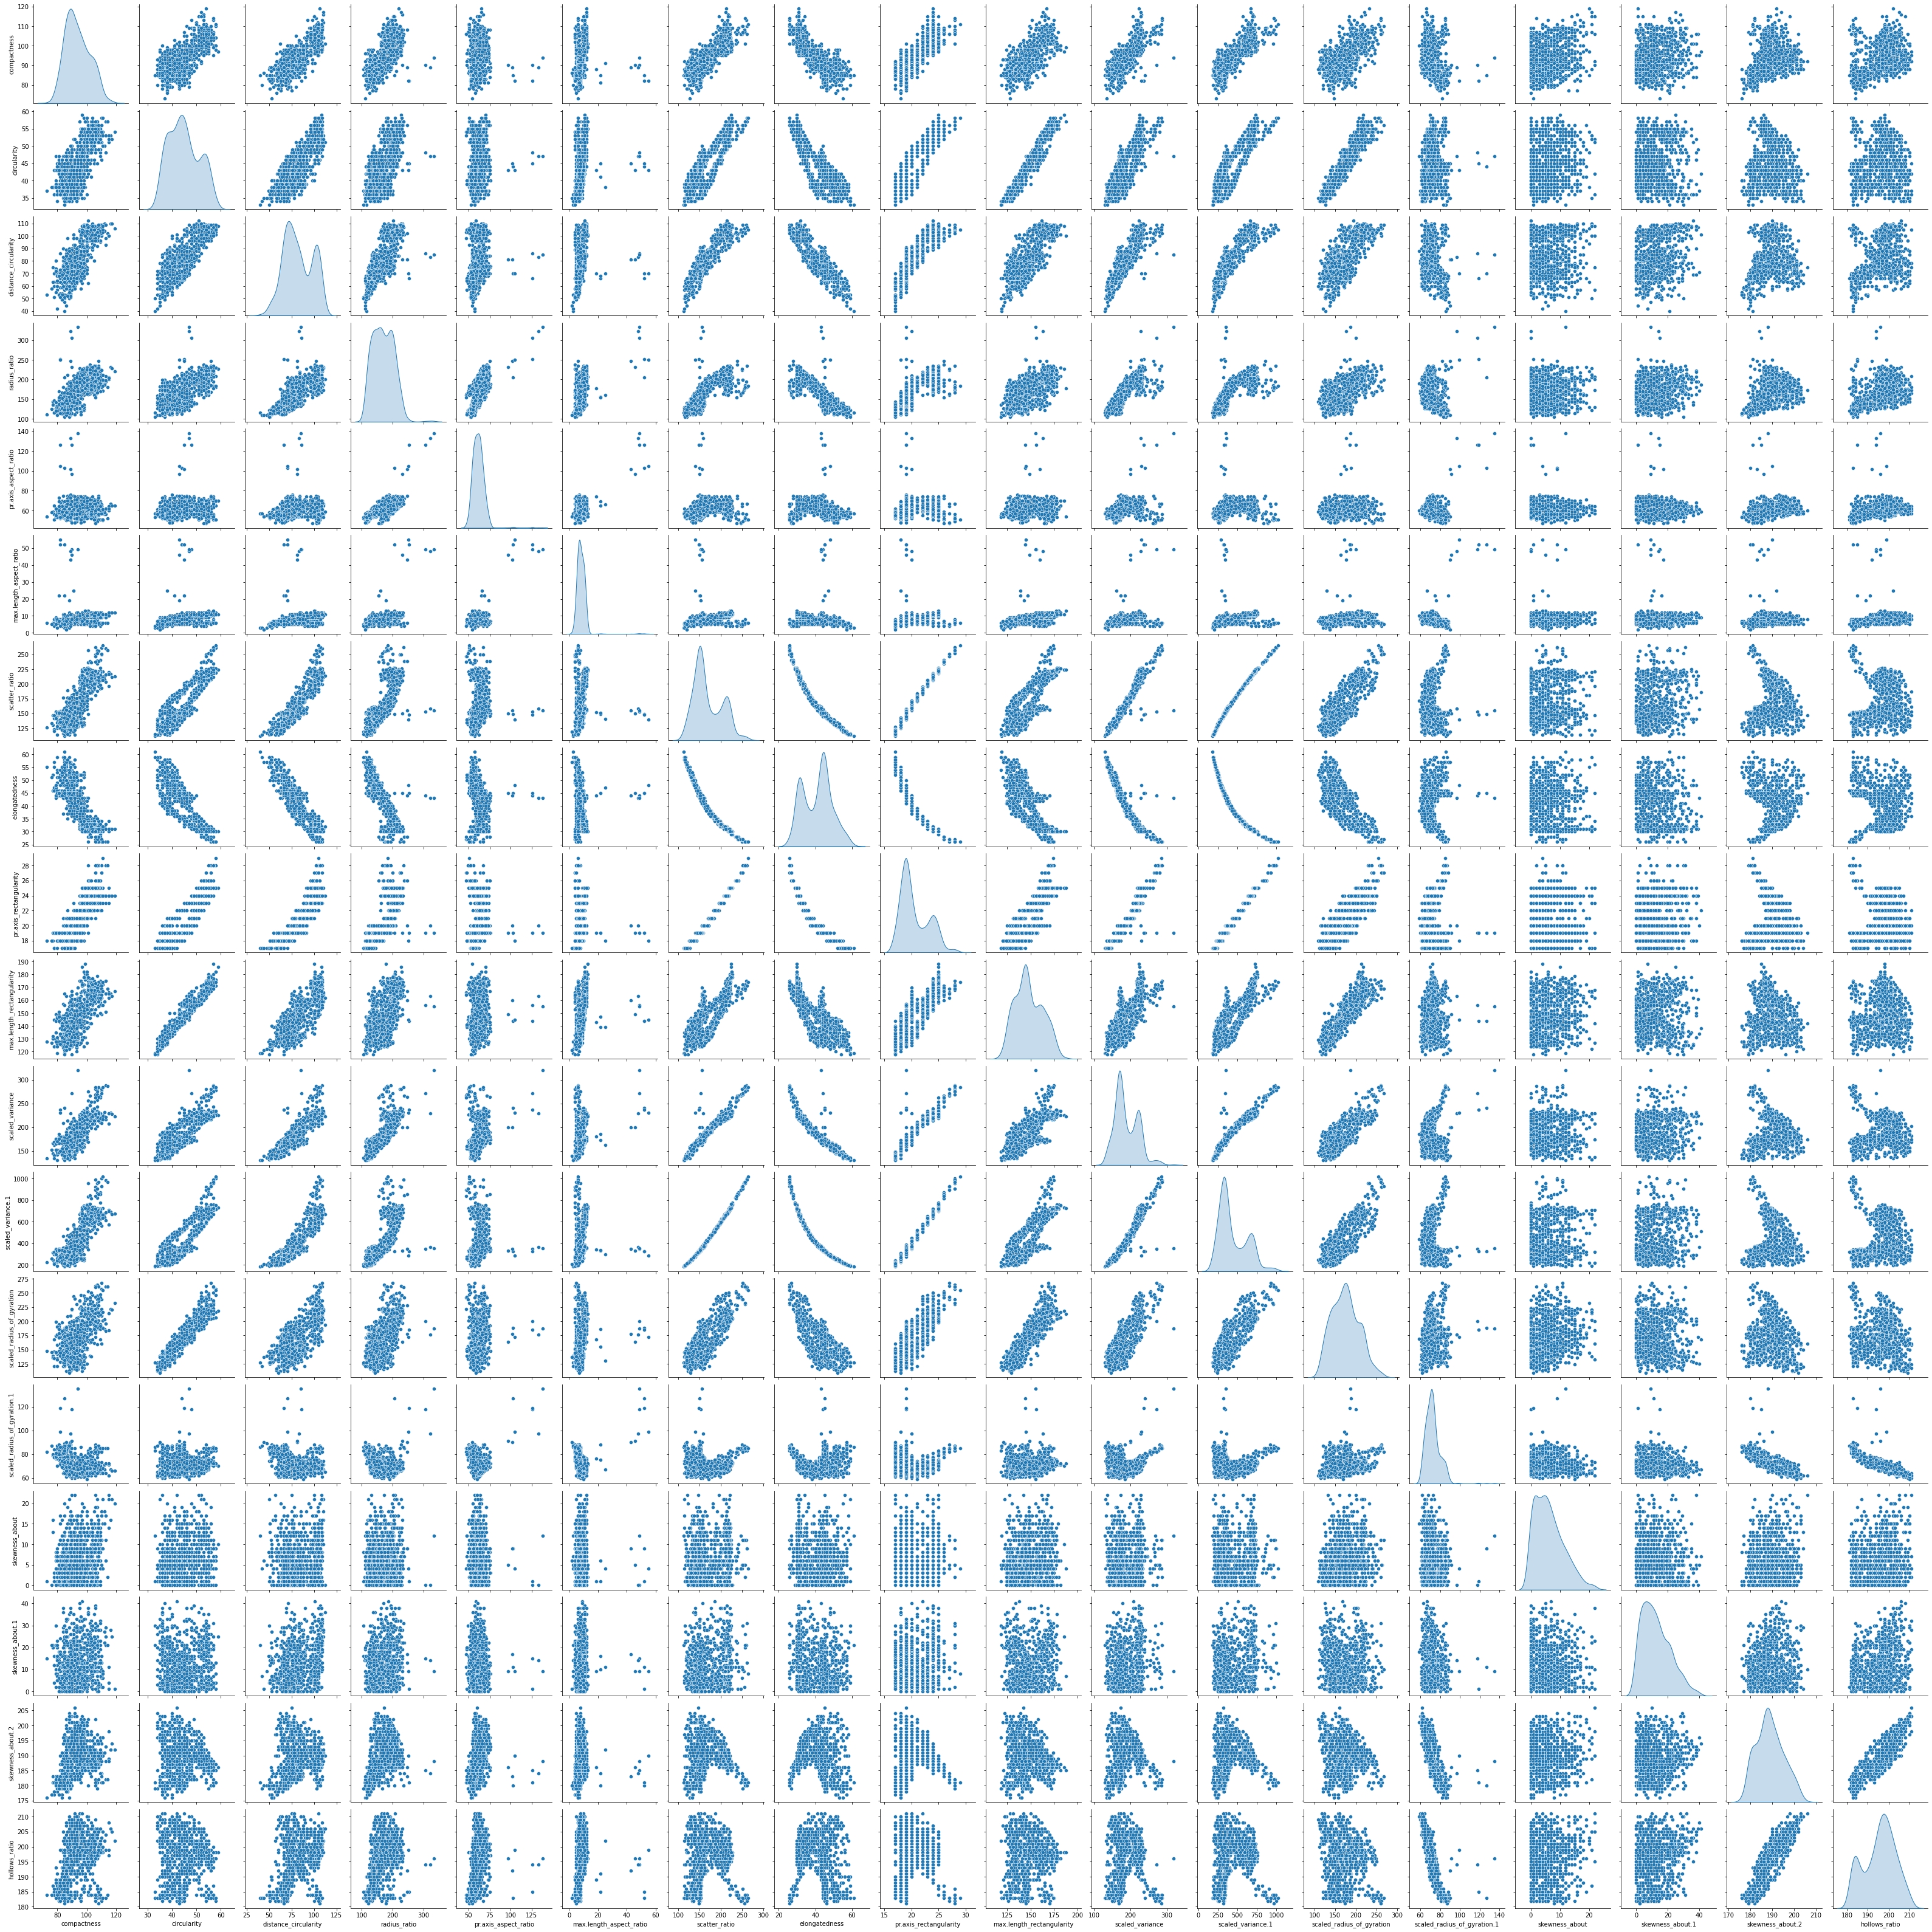

In [9]:
sns.pairplot(veh_df,diag_kind='kde')

array([[<AxesSubplot:title={'center':'compactness'}>,
        <AxesSubplot:title={'center':'circularity'}>,
        <AxesSubplot:title={'center':'distance_circularity'}>,
        <AxesSubplot:title={'center':'radius_ratio'}>],
       [<AxesSubplot:title={'center':'pr.axis_aspect_ratio'}>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}>,
        <AxesSubplot:title={'center':'scatter_ratio'}>,
        <AxesSubplot:title={'center':'elongatedness'}>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}>,
        <AxesSubplot:title={'center':'scaled_variance'}>,
        <AxesSubplot:title={'center':'scaled_variance.1'}>],
       [<AxesSubplot:title={'center':'scaled_radius_of_gyration'}>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}>,
        <AxesSubplot:title={'center':'skewness_about'}>,
        <AxesSubplot:title={'center':'skewness_about.1'}>],
       [<AxesSubplot:tit

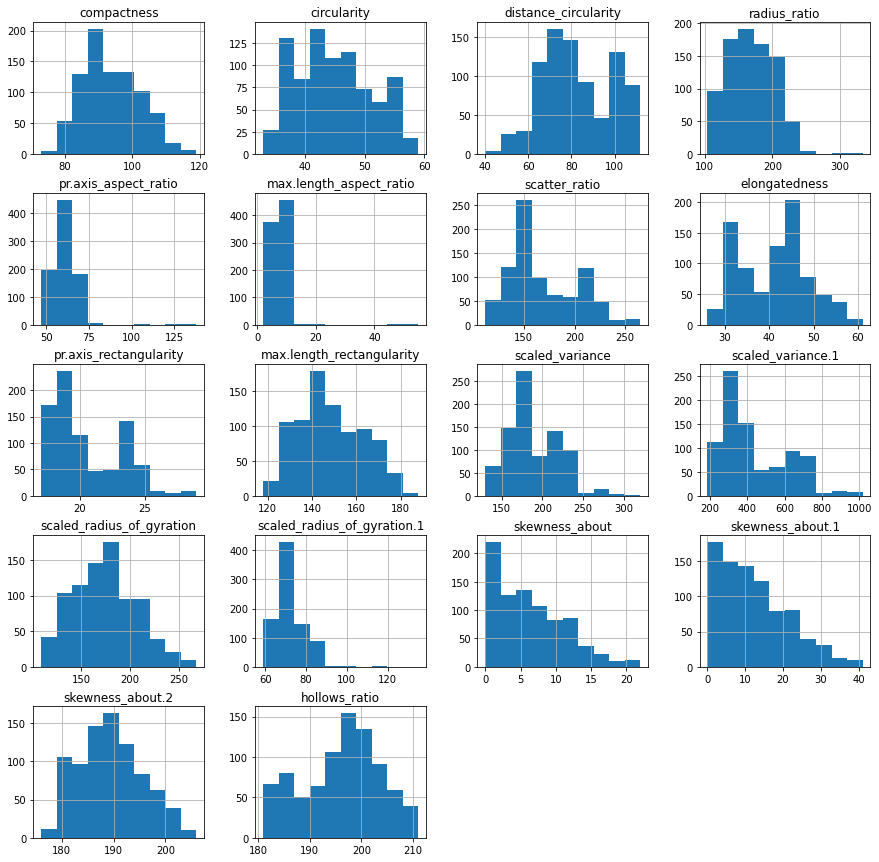

In [10]:
veh_df.hist(figsize=(15,15))

In [11]:
veh_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
## NAN imputation
for i in veh_df.columns[:18]:
    median_value = veh_df[i].median()
    veh_df[i] = veh_df[i].fillna(median_value)

In [13]:
veh_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
## Outlier handling

for col_name in veh_df.columns[:-1]:
    q1 = veh_df[col_name].quantile(0.25)
    q3 = veh_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1- 1.5*iqr
    high = q3 + 1.5*iqr
    
    veh_df.loc[(veh_df[col_name] < low) | (veh_df[col_name] > high), col_name] = veh_df[col_name].median()   
    

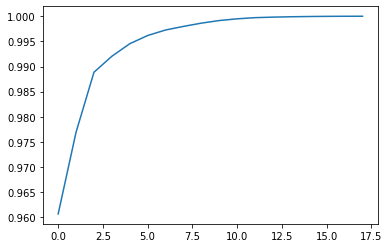

In [15]:
## Dimension reduction

X = veh_df.iloc[:,0:18]

from sklearn.decomposition import PCA

pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [16]:
pca = PCA(n_components=10)
pca.fit(X)

X = pca.transform(X)

In [17]:
from sklearn.model_selection import train_test_split

y = veh_df.iloc[:,18]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

model = SVC()

params = {'C' : [0.01, 0.1, 0.5,1], 'kernel' : ['linear','rbf']}


model1 = GridSearchCV(model, param_grid =params, verbose=5) 
model1.fit(X_train,y_train)

print('Best Hyper Parameter: \n', model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.857 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.815 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.814 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.856 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.856 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.504 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.504 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.857 total time=   0.4s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

model = SVC(C=0.01, kernel='linear')
scores = cross_val_score(model, X,y,cv=10)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(scores)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
## Naive Bayes

model = GaussianNB()
scores = cross_val_score(model,X,y,cv=10)
print(scores)